### Handling missing value

Missing value in a dataset is a very common phenomenon in reality. For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders.Values could be missing for many reasons, often specific to the problem domain, and might include reasons such as corrupt measurements or data unavailability.

Missing value correction is required to reduce bias (overfitting Error) and to produce powerful suitable models. Most of the algorithms can’t handle missing data, thus you need to act in some way to simply not let your code crash

1. Many machine learning algorithms fail if the dataset contains missing values.

2. However, algorithms like K-nearest and Naive Bayes support data with missing values.


3. You may end up building a biased machine learning model which will lead to incorrect results if the missing values are not handled properly.

4. Missing data can lead to a lack of precision in the statistical analysis.

There are four qualitatively distinct types of missing data. 

Missing data is either: 

structurally missing, 

missing completely at random (MCAR), 

missing at random, or nonignorable (also known as missing not at random).

Different types of missing data need to be treated differently in order for any analysis to be meaningful.

### Structurally missing data

Structurally missing data is data that is missing for a logical reason. In other words, it is data that is missing because it should not exist. In the table below, the first and third observations have missing values for Age of youngest child. This is because these people have no children. In the How many colas did you drink in the past 24 hours column, there are also structurally missing values. In this case, we can logically deduce that the correct value is 0, so this value should be used in place of the missing values in our analysis.
 
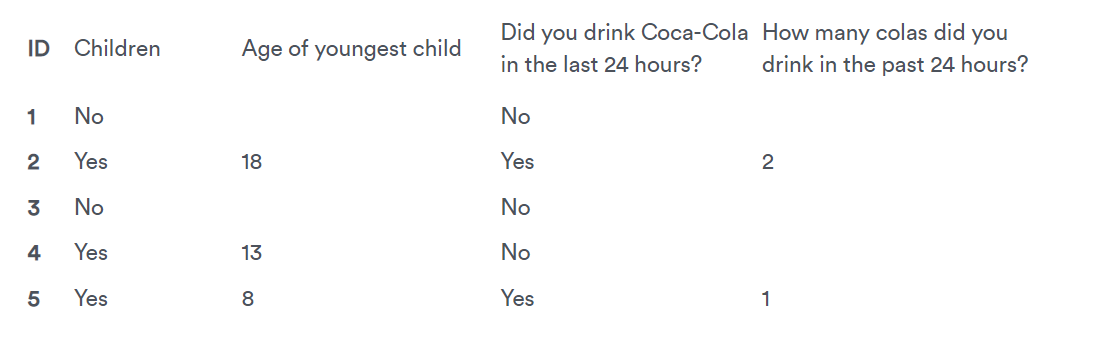


### Missing completely at random (MCAR)

Looking at the table below, we need to ask ourselves:

what is the likely income of the fourth observation? 

The simplest approach is to note that 50% of the other people have high incomes and 50% have low incomes. We could assume, therefore, that there is a 50% chance she has a high income and a 50% chance she has a low income. This is known as assuming that the missing value is missing completely at random (MCAR). When we make this assumption, we are assuming that whether or not the person has missing data is completely unrelated to the other information in the data.

### Missing at random (MAR)

In the case of missing completely at random, the assumption was that there was no pattern. An alternative assumption, known somewhat confusingly as missing at random (MAR) instead assumes that we can predict the value that is missing based on the other data.We use this assumption to return to the problem of trying to work out the value of the fourth observation on income. A simple predictive model is that income can be predicted based on gender and age. Looking at the table below, which is the same as the one above, we note that our missing value is for a Female aged 30 or more, and the other females aged 30 or more have a High income. As a result, we can predict that the missing value should be High. Note that the idea of prediction does not mean we can perfectly predict a relationship. All that is required is a probabilistic relationship (i.e., that we have a better than random probability of predicting the true value of the missing data).
When data is missing at random, it means that we need to either use an advanced imputation method, such as multiple imputation, or an analysis method specifically designed for missing at random data.

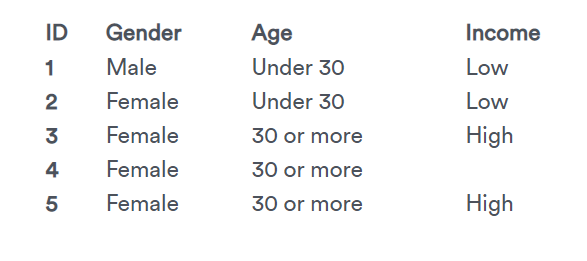

### Missing not at random (nonignorable)

It may be the case that we cannot confidently make any conclusions about the likely value of missing data. For example, it is possible that people with very low incomes and very high incomes tend to refuse to answer. Or there could be some other reason we just do not know. This is known as missing not at random data and also as nonignorable missing data.
It is common to include structural missing data as a special case of data that is missing not at random. However, this misses an important distinction. Structurally missing data is easy to analyze, whereas other forms of missing not at random data are highly problematic.
When data is missing, not at random, it means that we cannot use any of the standard methods for dealing with missing data (e.g., imputation, or algorithms specifically designed for missing values). If the missing data is missing, not at random, any standard calculations give the wrong answer

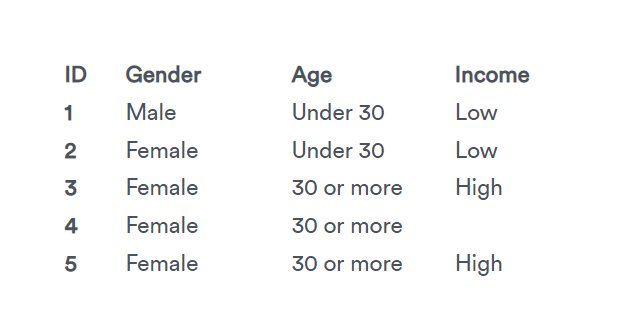


### Detection of Missing Data

#### With Python Code

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymongo
import json
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [375]:
data=pd.read_csv("Home_Credit_Default_Risk1.csv")

In [376]:
data.shape


(10000, 122)

In [377]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,333185,0,Revolving loans,F,N,Y,0,112500.0,202500.0,10125.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,293761,0,Cash loans,F,Y,N,0,157500.0,261288.0,12838.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,9.0
2,192407,0,Cash loans,F,N,Y,0,90000.0,508495.5,22527.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,203675,0,Cash loans,F,Y,N,0,121500.0,225000.0,17905.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
4,428596,0,Cash loans,M,Y,N,1,382500.0,463500.0,22428.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,222903,0,Cash loans,M,Y,Y,2,157500.0,450000.0,17095.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
9996,412902,0,Cash loans,F,Y,Y,1,225000.0,755190.0,36459.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
9997,410430,0,Cash loans,F,N,N,0,157500.0,1042560.0,40702.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
9998,338832,0,Cash loans,M,Y,N,0,360000.0,1436850.0,46480.5,...,0,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0


In [12]:
cat = data.select_dtypes(include=['object'])  # separater the categorical column from the data set
cat
len(cat)
cat.shape

(10000, 16)

In [16]:
num = data.select_dtypes(include=['int64', "float64"]) # separater the numerical column from the data set
num.shape

(10000, 106)

In [19]:
data['CODE_GENDER'] = pd.Categorical(data['CODE_GENDER'])

data['CODE_GENDER']

0       F
1       F
2       F
3       F
4       M
       ..
9995    M
9996    F
9997    F
9998    M
9999    F
Name: CODE_GENDER, Length: 10000, dtype: category
Categories (2, object): ['F', 'M']

In [31]:
data["FLAG_OWN_CAR"].unique() # Return the how many unique value list 
#data["FLAG_OWN_CAR"].value_counts()  # Return which unique value count value list
#data["FLAG_OWN_CAR"].nunique() # Return the total number unique value list

array(['N', 'Y'], dtype=object)

In [22]:
data['AMT_CREDIT'] = pd.to_numeric(data['AMT_CREDIT'])

data['AMT_CREDIT']

0        202500.0
1        261288.0
2        508495.5
3        225000.0
4        463500.0
          ...    
9995     450000.0
9996     755190.0
9997    1042560.0
9998    1436850.0
9999     957033.0
Name: AMT_CREDIT, Length: 10000, dtype: float64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: category(1), float64(65), int64(41), object(15)
memory usage: 9.2+ MB


In [23]:
profile = ProfileReport(data, title="Pandas Profiling Report")

profile.to_widgets()

In [24]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,333185,0,Revolving loans,F,N,Y,0,112500.0,202500.0,10125.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,293761,0,Cash loans,F,Y,N,0,157500.0,261288.0,12838.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,9.0
2,192407,0,Cash loans,F,N,Y,0,90000.0,508495.5,22527.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,203675,0,Cash loans,F,Y,N,0,121500.0,225000.0,17905.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
4,428596,0,Cash loans,M,Y,N,1,382500.0,463500.0,22428.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,5.0


In [36]:
data.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     1357
AMT_REQ_CREDIT_BUREAU_WEEK    1357
AMT_REQ_CREDIT_BUREAU_MON     1357
AMT_REQ_CREDIT_BUREAU_QRT     1357
AMT_REQ_CREDIT_BUREAU_YEAR    1357
Length: 122, dtype: int64

In [38]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [43]:
titanic=pd.read_csv("titanic.csv")

In [44]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
titanic.shape

(891, 12)

In [8]:
data.shape

(10000, 122)

In [63]:
titanic.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


titanic[titanic.Age.isnull()==True]

In [56]:
data_sample=data.head(1000)
data_sample

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,333185,0,Revolving loans,F,N,Y,0,112500.0,202500.0,10125.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,293761,0,Cash loans,F,Y,N,0,157500.0,261288.0,12838.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,9.0
2,192407,0,Cash loans,F,N,Y,0,90000.0,508495.5,22527.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,203675,0,Cash loans,F,Y,N,0,121500.0,225000.0,17905.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
4,428596,0,Cash loans,M,Y,N,1,382500.0,463500.0,22428.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,199890,0,Cash loans,F,N,N,0,90000.0,490536.0,22995.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
996,222880,0,Cash loans,M,Y,N,1,90000.0,78192.0,9279.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
997,426020,0,Cash loans,F,N,Y,0,135000.0,454500.0,14791.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
998,285171,0,Cash loans,F,N,N,0,90000.0,47970.0,5044.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [57]:
data_sample.isnull()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
data_sample.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     142
AMT_REQ_CREDIT_BUREAU_WEEK    142
AMT_REQ_CREDIT_BUREAU_MON     142
AMT_REQ_CREDIT_BUREAU_QRT     142
AMT_REQ_CREDIT_BUREAU_YEAR    142
Length: 122, dtype: int64

In [61]:
data_sample.info(verbose=True)

""" 
# verbose : bool, optional Whether to print the full summary.
By default, the setting in pandas.options.display.max_info_columns`` is followed.

"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 122 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE            object  
 3    CODE_GENDER                   category
 4    FLAG_OWN_CAR                  object  
 5    FLAG_OWN_REALTY               object  
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT                    float64 
 9    AMT_ANNUITY                   float64 
 10   AMT_GOODS_PRICE               float64 
 11   NAME_TYPE_SUITE               object  
 12   NAME_INCOME_TYPE              object  
 13   NAME_EDUCATION_TYPE           object  
 14   NAME_FAMILY_STATUS            object  
 15   NAME_HOUSING_TYPE             object  
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH                    in

' \n# verbose : bool, optional Whether to print the full summary.\nBy default, the setting in andas.options.display.max_info_columns`` is followed.\n\n'

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: category(1), float64(65), int64(41), object(15)
memory usage: 9.2+ MB


In [64]:
titanic.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
#  missind value in tha data variable dataset

data_sample.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     142
AMT_REQ_CREDIT_BUREAU_WEEK    142
AMT_REQ_CREDIT_BUREAU_MON     142
AMT_REQ_CREDIT_BUREAU_QRT     142
AMT_REQ_CREDIT_BUREAU_YEAR    142
Length: 122, dtype: int64

In [66]:
df_missing=data_sample['AMT_REQ_CREDIT_BUREAU_YEAR']

In [69]:
len(list(df_missing))


1000

In [70]:
data_sample.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,1000.00000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.00000,9.990000e+02,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.0,1000.0,1000.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,275775.27400,0.094000,0.424000,1.694280e+05,5.870398e+05,26526.07800,5.290321e+05,0.020339,-15995.389000,69904.701000,...,0.008000,0.0,0.0,0.001000,0.003497,0.003497,0.030303,0.291375,0.233100,1.909091
std,102141.79255,0.291975,0.718847,9.607930e+04,3.988823e+05,13775.83604,3.641716e+05,0.013782,4459.663397,145904.799372,...,0.089129,0.0,0.0,0.031623,0.059062,0.059062,0.178193,1.288653,0.550146,1.842361
min,100096.00000,0.000000,0.000000,2.700000e+04,4.500000e+04,3172.50000,4.500000e+04,0.000533,-24944.000000,-14513.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,186390.25000,0.000000,0.000000,1.125000e+05,2.700000e+05,16439.62500,2.385000e+05,0.009919,-19835.750000,-2411.750000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,275899.50000,0.000000,0.000000,1.485000e+05,5.013540e+05,24441.75000,4.500000e+05,0.018801,-15546.000000,-1072.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,360614.50000,0.000000,1.000000,2.025000e+05,7.982021e+05,33274.12500,6.750000e+05,0.026392,-12476.250000,-237.500000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,455824.00000,1.000000,4.000000,1.035000e+06,2.695500e+06,91570.50000,2.250000e+06,0.072508,-7778.000000,365243.000000,...,1.000000,0.0,0.0,1.000000,1.000000,1.000000,2.000000,24.000000,3.000000,9.000000


In [71]:
data_sample.notnull().sum()

SK_ID_CURR                    1000
TARGET                        1000
NAME_CONTRACT_TYPE            1000
CODE_GENDER                   1000
FLAG_OWN_CAR                  1000
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY      858
AMT_REQ_CREDIT_BUREAU_WEEK     858
AMT_REQ_CREDIT_BUREAU_MON      858
AMT_REQ_CREDIT_BUREAU_QRT      858
AMT_REQ_CREDIT_BUREAU_YEAR     858
Length: 122, dtype: int64

In [78]:
titanic.notnull().sum()


"""
    RETURN THE VALUE COUNTS OF THE COLUMNS WHICH COLUMN HAS NONULL VALUE ,
    AND THOSE COLUMNS HAS NULL VALUE IT WILL ONLY RETURN THE COUNT OF NOT NULL VALUE.

"""

titanic.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [76]:
titanic.isnull().sum()
"""
isnull and isna return those columns which has null value and 
howmany many null value and those column has no null value return zero. 

"""
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### With Visulization also we can detect there is missing value or not

In [85]:
pd.DataFrame(titanic['Age'])

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


<AxesSubplot:>

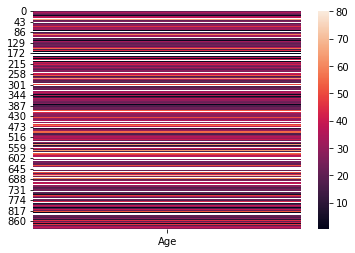

In [79]:
import seaborn
seaborn.heatmap(pd.DataFrame(titanic['Age']))

In [81]:
import seaborn as sns

<AxesSubplot:>

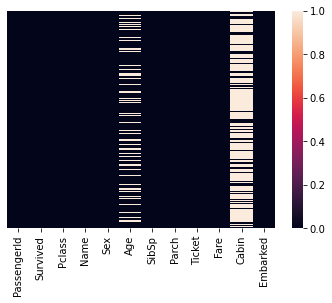

In [84]:
sns.heatmap(titanic.isnull(),yticklabels=False)

In [87]:
import seaborn
seaborn.heatmap(titanic)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [88]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 1.Heatmap

In [89]:
import missingno as msno

<AxesSubplot:>

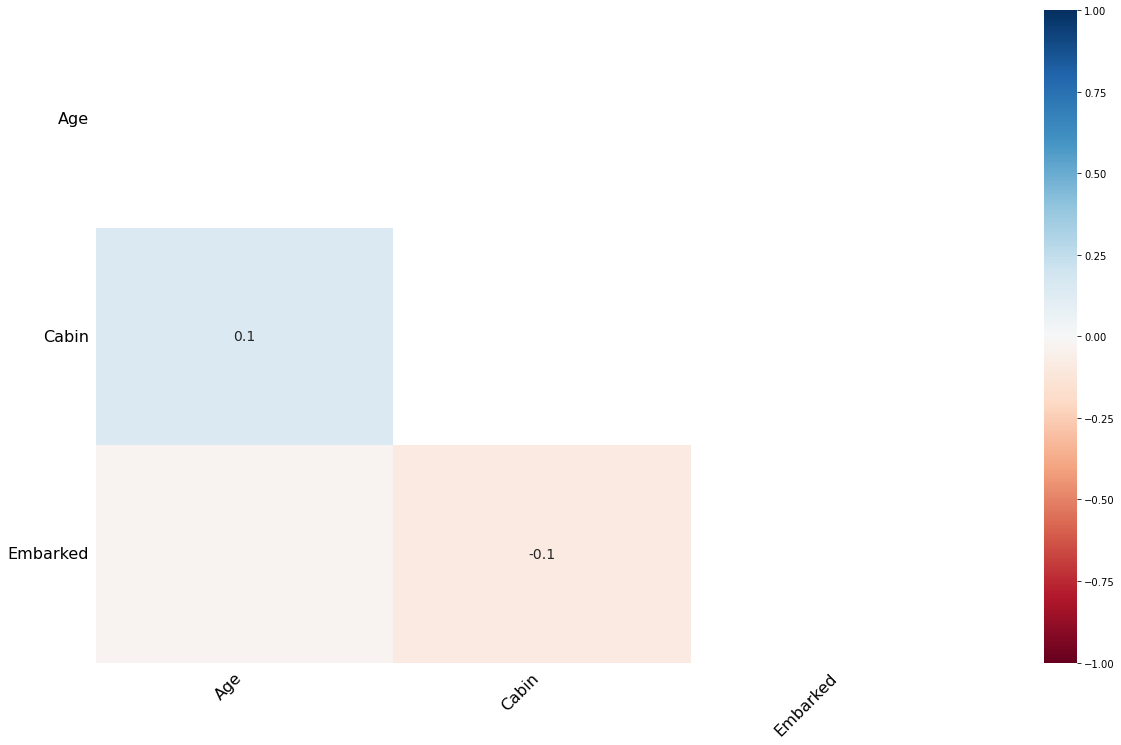

In [90]:
msno.heatmap(titanic)

<AxesSubplot:>

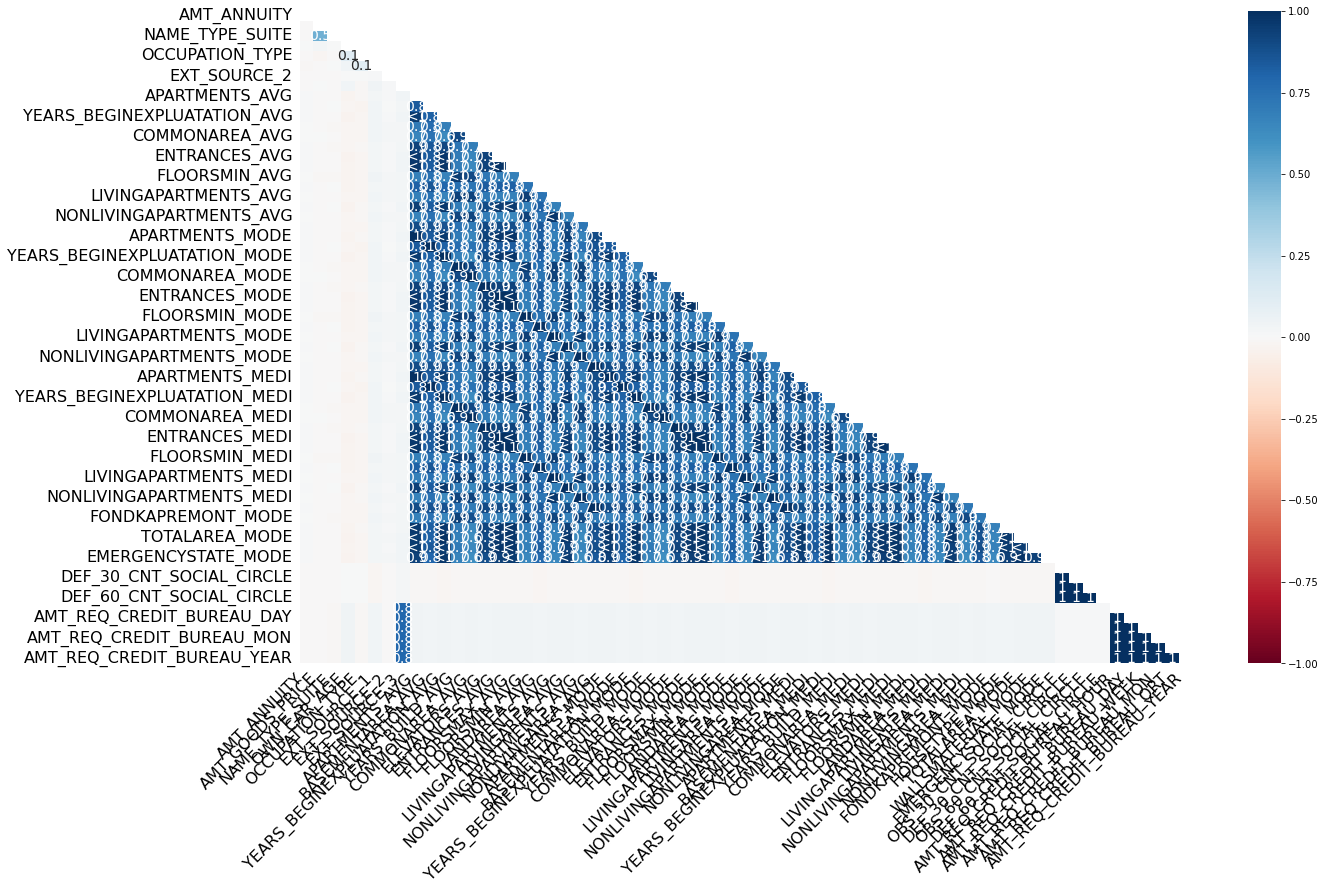

In [104]:
msno.heatmap(data)

msno.heatmap(titanic)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show();

# Missingo heatmap

## The missingno correlation heatmap measures nullity correlation:

    how strongly the presence or absence of one variable affects the presence of another. Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does). Entries marked  <1  or  <−1  have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so. This points to a small number of records in the dataset which are erroneous.

#### Also, missingno.heatmap visualizes the correlation matrix about the locations of missing values in columns.

#### missingno module has more features, such as the bar chart of the number of missing values in each column and the dendrogram generated from the correlation of missing value locations.

# What is MSNO heatmap?


The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.

In [91]:
pd.DataFrame(df_missing)

,AMT_REQ_CREDIT_BUREAU_YEAR
0,NaN
1,9.0
2,1.0
3,2.0
4,5.0
...,...
995,2.0
996,NaN
997,2.0
998,1.0


<AxesSubplot:>

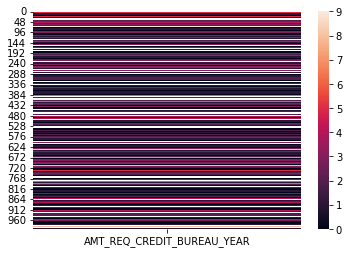

In [92]:
import seaborn
seaborn.heatmap(pd.DataFrame(df_missing))

# 2.Bar Chart

### The most basic plot for visualizing missing values is the bar chart. 

<AxesSubplot:>

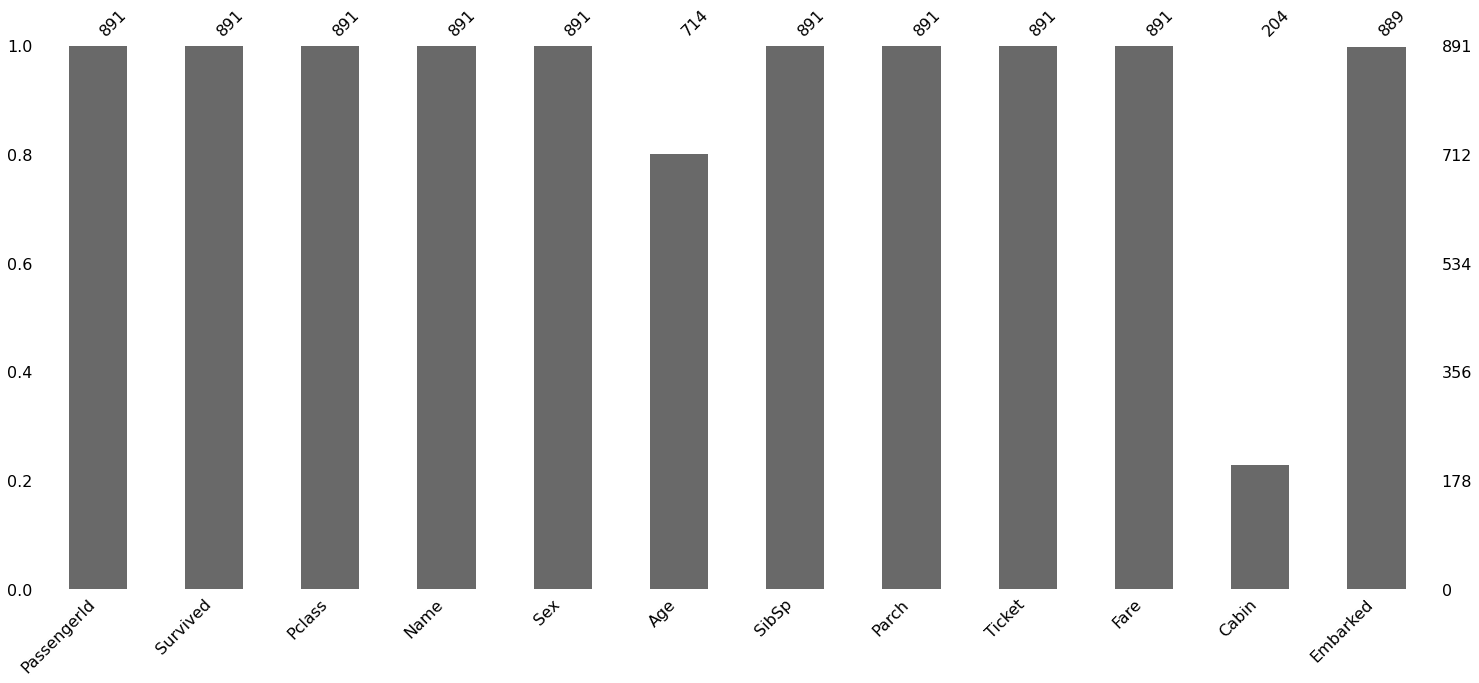

In [95]:
msno.bar(titanic)

<AxesSubplot:>

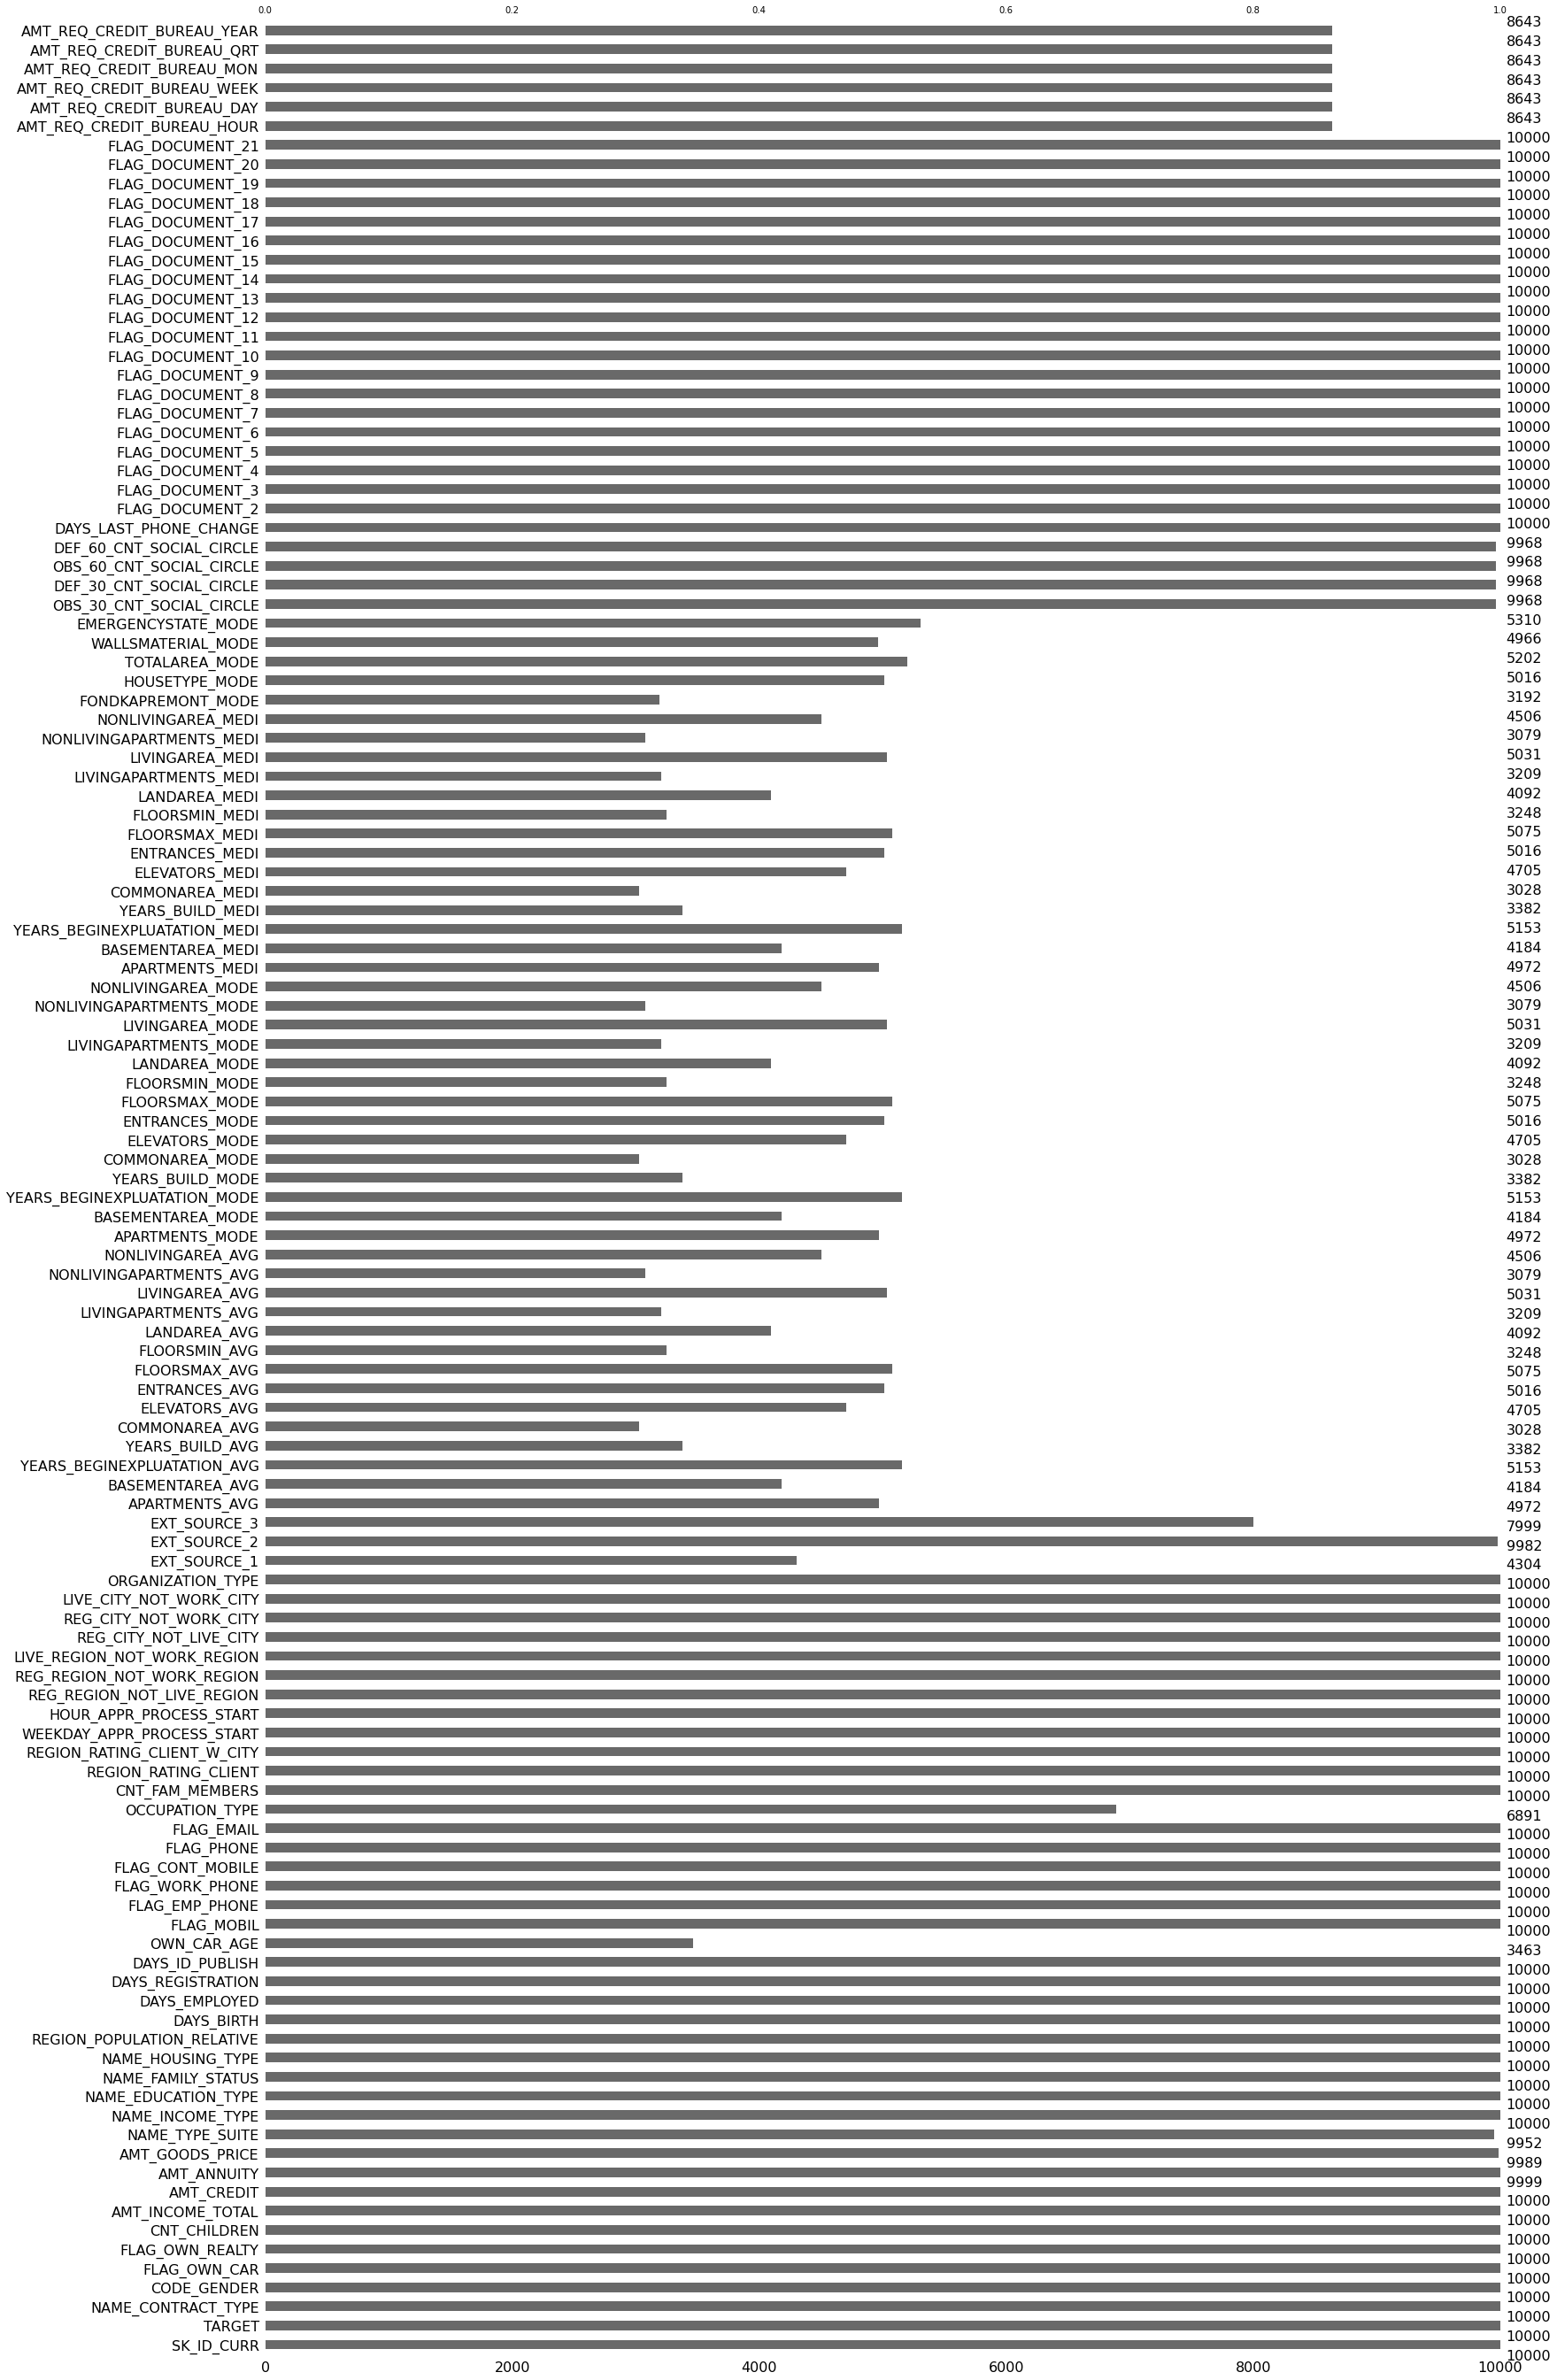

In [103]:
msno.bar(data)

### Although a bar char is simple, there is no way to see which parts of a feature that is missing. In the next section, I will show you how to see this with missingno’s matrix function.

# 3.Matrix

##### Another utility visualization that missingno provides is the matrix plot.

#### Simply use the matrix() function as follows:

A nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion. The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset. This visualization will comfortably accommodate up to 50 labelled variables. Past that range labels begin to overlap or become unreadable, and by default large displays omit them.

<AxesSubplot:>

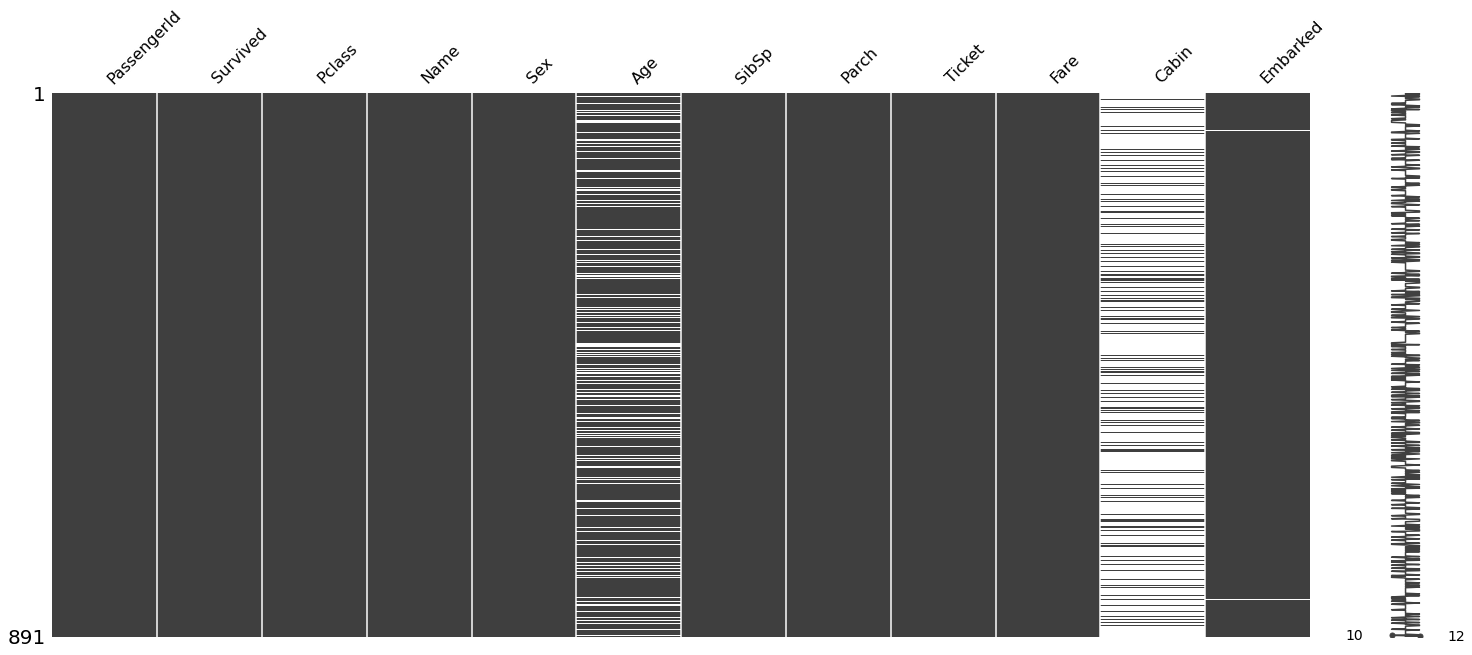

In [96]:
msno.matrix(titanic)


<AxesSubplot:>

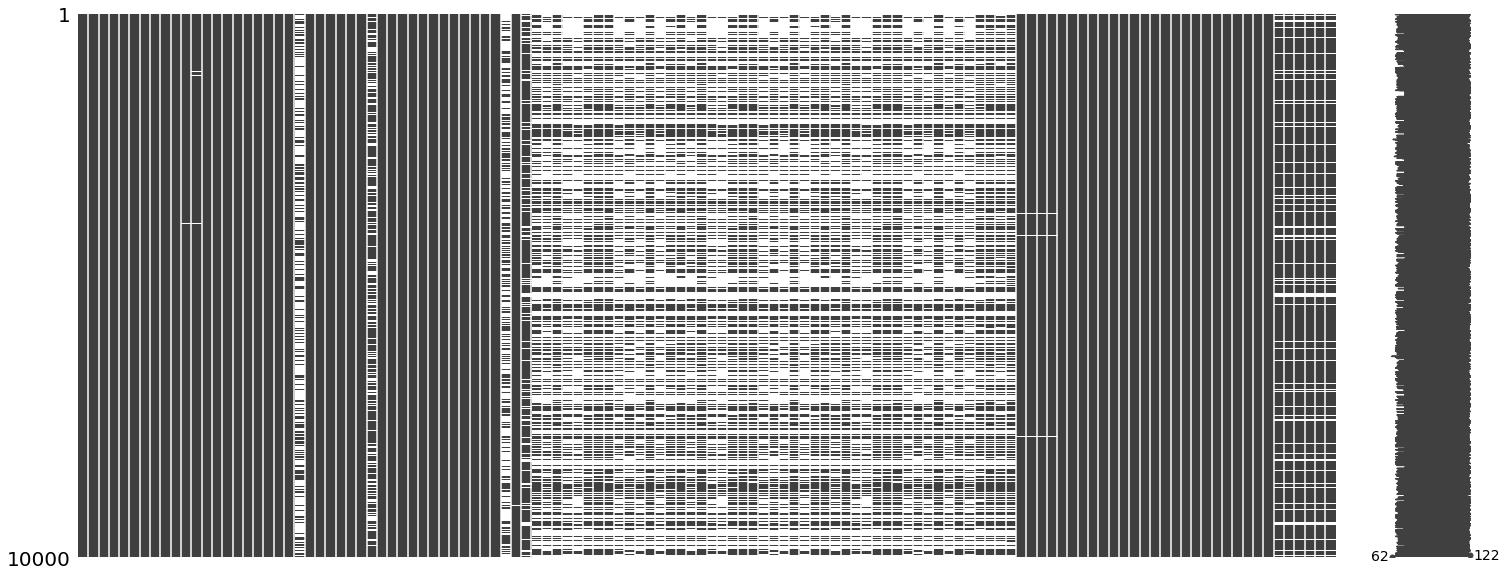

In [102]:
msno.matrix(data)

### another utility visualization that missingno provides is the matrix plot. Simply use the matrix() function as follows:

### Missing Data Not At Random(MNAR): Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

# 4.Dendrogram

## Missingo dendrogram:
    
The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap. The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero. To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

<AxesSubplot:>

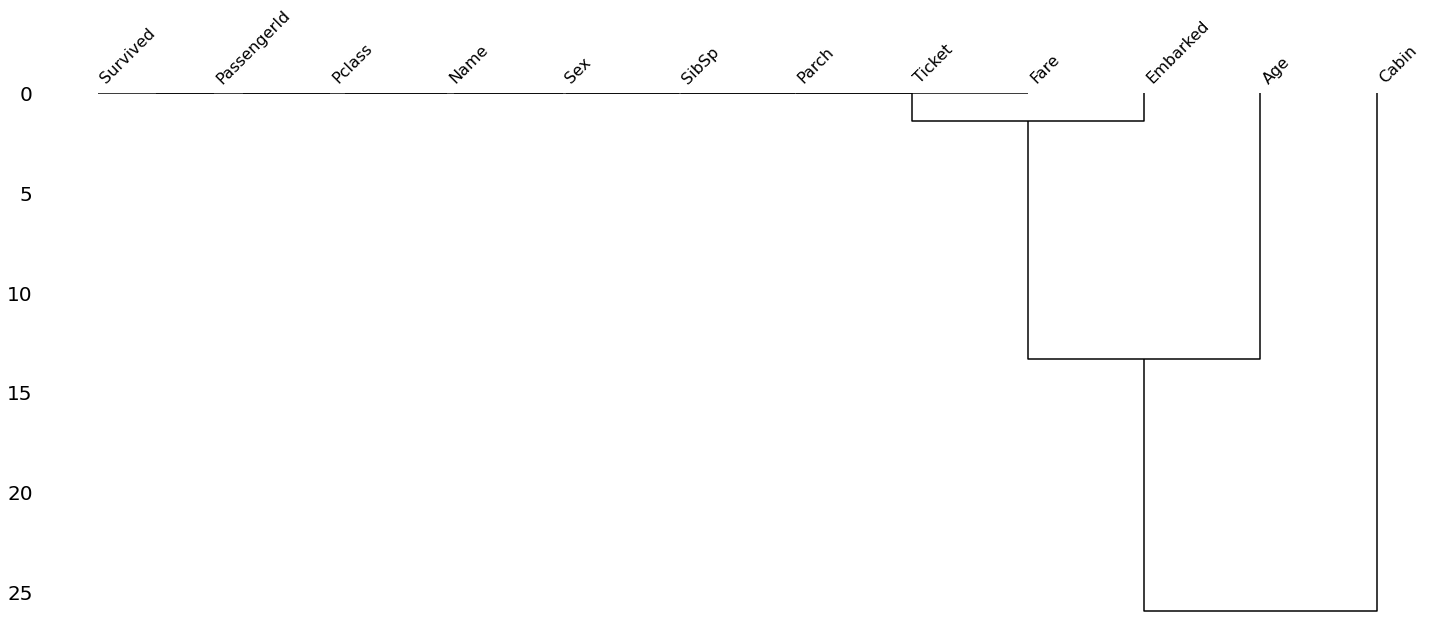

In [98]:
msno.dendrogram(titanic)

In [100]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

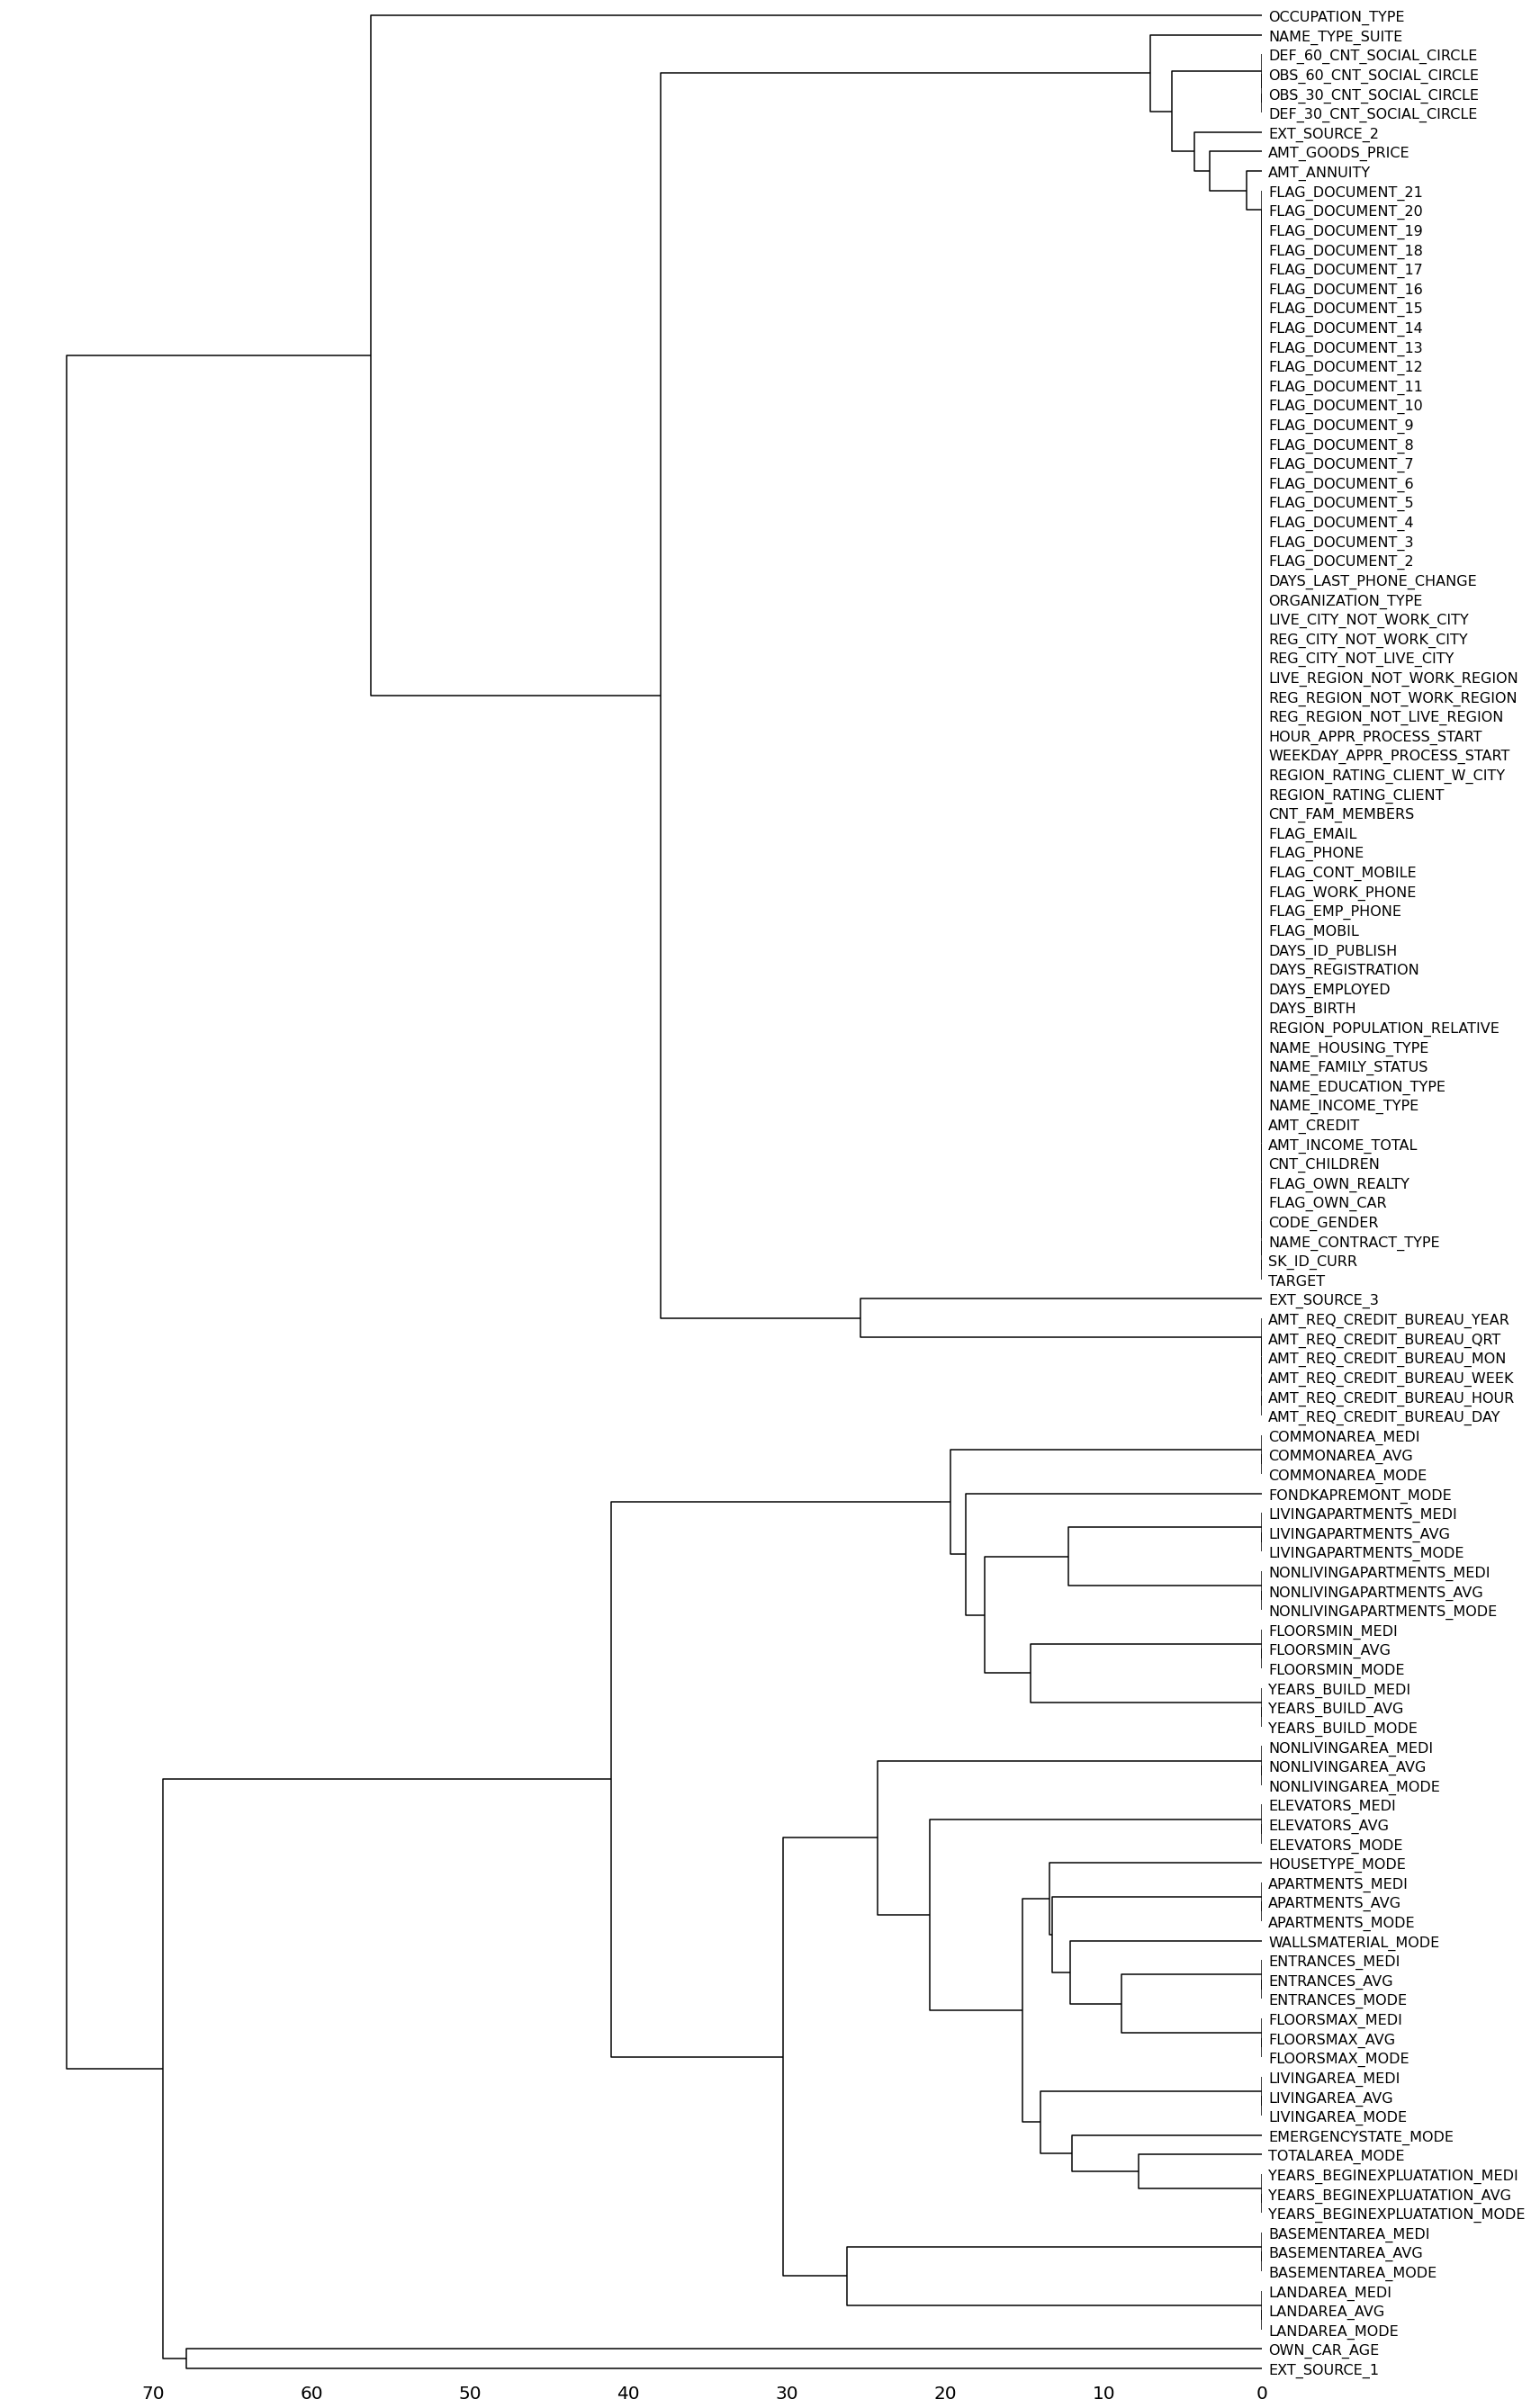

In [101]:
msno.dendrogram(data)

### pandas porfiling will give the entire analysis

In [105]:
### To Create the Simple report quickly
profile = ProfileReport(data_sample, title='Pandas Profiling Report', explorative=True)



profile.to_widgets()


profile.to_notebook_iframe()

profile.to_file("output.html")


### Method for handling missing values

1.Filling with Arbitrary value or Replace NaN with a Scalar Value

2.Filing Nan with pad/fill(Fill methods Forward) and bfill/backfill(Fill methods Backward)

3.Drop Missing Values

4.statical method

  - mean 

  - median 

  - mode

5.Capturing NAN values with a new feature

6.End of Distribution imputation

7.using different model(knn imputer) or  Predicting The Missing Values

8.using algorithm that support missing value

### How To Handle Categorical Missing Values

### Importing a libraries

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymongo
import json
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

### convert data into json

In [108]:
'''def csv_to_json(filename):
    data = pd.read_csv(filename)
    return data.to_dict('records')
json_data=csv_to_json("Home_Credit_Default_Risk1.csv")'''

'def csv_to_json(filename):\n    data = pd.read_csv(filename)\n    return data.to_dict(\'records\')\njson_data=csv_to_json("Home_Credit_Default_Risk1.csv")'

### Inserting the data into mongo db

In [109]:
'''# package which enables us to connect to the MongoDB
dbConn = pymongo.MongoClient("mongodb://localhost:27017/") # connecting to the locally running MongoDB Instance
# connecting to the database named demoDB present in the mongoDB if the database is not present, it'll autoamtically create it.
dbname='home_credit_default'
db = dbConn[dbname] 
# connecting to a collection--- collections are analogous to tables
collection_name='dataset'
collection=db[collection_name]  # connectig to the collection itself present in the database.
# inserting many records into the collection 
collection.insert_many(json_data)'''

'# package which enables us to connect to the MongoDB\ndbConn = pymongo.MongoClient("mongodb://localhost:27017/") # connecting to the locally running MongoDB Instance\n# connecting to the database named demoDB present in the mongoDB if the database is not present, it\'ll autoamtically create it.\ndbname=\'home_credit_default\'\ndb = dbConn[dbname] \n# connecting to a collection--- collections are analogous to tables\ncollection_name=\'dataset\'\ncollection=db[collection_name]  # connectig to the collection itself present in the database.\n# inserting many records into the collection \ncollection.insert_many(json_data)'

### Importing a data from mongodb

In [110]:
import pymongo
#connect with mongodb
dbConn = pymongo.MongoClient("mongodb://localhost:27017/") # connecting to the locally running MongoDB Instance
# connecting to the database named demoDB present in the mongoDB if the database is not present, it'll autoamtically create it.
dbname='home_credit_default'
db = dbConn[dbname]

In [111]:
# connecting to a collection--- collections are analogous to tables
collection_name='dataset'
# connectig to the collection itself present in the database.
collection=db[collection_name]  

In [112]:
# retieving all the records from collection
result= collection.find({}) 

In [113]:
result[3]

IndexError: no such item for Cursor instance

In [36]:
data=list(result)

In [37]:
data

[]

In [38]:
# Expand the cursor and construct the DataFrame
df =pd.DataFrame(data)

In [39]:
df

""


In [40]:
# Delete the _id
if '_id' in df:
    del df['_id']

In [41]:
df.head()

""


In [42]:
 #df.to_csv('Home_Credit_Default_Risk1.csv', index=False)

In [43]:
#Home Credit Default Risk data.The dataset has given me information can you predict how capable each applicant is of repaying a loan?
data=pd.read_csv("Home_Credit_Default_Risk1.csv")
pd.pandas.set_option('display.max_rows',None)


In [44]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,333185,0,Revolving loans,F,N,Y,0,112500.0,202500.0,10125.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,293761,0,Cash loans,F,Y,N,0,157500.0,261288.0,12838.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,9.0
2,192407,0,Cash loans,F,N,Y,0,90000.0,508495.5,22527.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,203675,0,Cash loans,F,Y,N,0,121500.0,225000.0,17905.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
4,428596,0,Cash loans,M,Y,N,1,382500.0,463500.0,22428.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,5.0


### Pandas Profiling for finding insight from data

### To Create the Simple report quickly
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)

profile.to_widgets()
profile.to_notebook_iframe()

profile.to_file("output.html")

In [114]:
data.shape

(10000, 122)

In [115]:
data.info(verbose=True, null_counts=True)

C:\Users\sony\AppData\Local\Temp/ipykernel_3032/2802456010.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 122 columns):
 #    Column                        Non-Null Count  Dtype   
---   ------                        --------------  -----   
 0    SK_ID_CURR                    10000 non-null  int64   
 1    TARGET                        10000 non-null  int64   
 2    NAME_CONTRACT_TYPE            10000 non-null  object  
 3    CODE_GENDER                   10000 non-null  category
 4    FLAG_OWN_CAR                  10000 non-null  object  
 5    FLAG_OWN_REALTY               10000 non-null  object  
 6    CNT_CHILDREN                  10000 non-null  int64   
 7    AMT_INCOME_TOTAL              10000 non-null  float64 
 8    AMT_CREDIT                    10000 non-null  float64 
 9    AMT_ANNUITY                   9999 non-null   float64 
 10   AMT_GOODS_PRICE               9989 non-null   float64 
 11   NAME_TYPE_SUITE               9952 non-null   object  
 12   NAME_INCOME_TYPE              1

In [116]:
data.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     1357
AMT_REQ_CREDIT_BUREAU_WEEK    1357
AMT_REQ_CREDIT_BUREAU_MON     1357
AMT_REQ_CREDIT_BUREAU_QRT     1357
AMT_REQ_CREDIT_BUREAU_YEAR    1357
Length: 122, dtype: int64

In [117]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_null_values=[features for features in data.columns if data[features].isnull().sum()>=1]

In [124]:
data["NAME_TYPE_SUITE"].isnull().sum()>=48

True

In [118]:
features_with_null_values

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',

In [51]:
#you can check the percentage of missing value in any variable
for feature in features_with_null_values:
    print(feature, np.round(data[feature].isnull().mean()*100, 2),' % missing values')

AMT_ANNUITY 0.01  % missing values
AMT_GOODS_PRICE 0.11  % missing values
NAME_TYPE_SUITE 0.48  % missing values
OWN_CAR_AGE 65.37  % missing values
OCCUPATION_TYPE 31.09  % missing values
EXT_SOURCE_1 56.96  % missing values
EXT_SOURCE_2 0.18  % missing values
EXT_SOURCE_3 20.01  % missing values
APARTMENTS_AVG 50.28  % missing values
BASEMENTAREA_AVG 58.16  % missing values
YEARS_BEGINEXPLUATATION_AVG 48.47  % missing values
YEARS_BUILD_AVG 66.18  % missing values
COMMONAREA_AVG 69.72  % missing values
ELEVATORS_AVG 52.95  % missing values
ENTRANCES_AVG 49.84  % missing values
FLOORSMAX_AVG 49.25  % missing values
FLOORSMIN_AVG 67.52  % missing values
LANDAREA_AVG 59.08  % missing values
LIVINGAPARTMENTS_AVG 67.91  % missing values
LIVINGAREA_AVG 49.69  % missing values
NONLIVINGAPARTMENTS_AVG 69.21  % missing values
NONLIVINGAREA_AVG 54.94  % missing values
APARTMENTS_MODE 50.28  % missing values
BASEMENTAREA_MODE 58.16  % missing values
YEARS_BEGINEXPLUATATION_MODE 48.47  % missing

In [125]:
np.round(data["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().mean()*100, 2)

13.57

In [131]:
data["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull()

0        True
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: AMT_REQ_CREDIT_BUREAU_YEAR, Length: 10000, dtype: bool

In [130]:
data["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum()

1357

In [138]:
np.round(data["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().mean()*100)

14.0

In [140]:
np.round(data["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().mean()*100,2) # decimal=2

13.57

In [141]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'object']
numerical_features

['SK_ID_CURR',
 'TARGET',
 'CODE_GENDER',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MOD

In [142]:
print('Number of numerical variables: ',len(numerical_features))

Number of numerical variables:  107


In [144]:
# visualise the numerical variables
data_with_numerical_feature=data[numerical_features]

In [145]:
data_with_numerical_feature.head()

,SK_ID_CURR,TARGET,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,333185,0,F,0,112500.0,202500.0,10125.0,202500.0,0.031329,-8011,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,293761,0,F,0,157500.0,261288.0,12838.5,171000.0,0.019689,-20861,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,9.0
2,192407,0,F,0,90000.0,508495.5,22527.0,454500.0,0.014464,-23507,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,203675,0,F,0,121500.0,225000.0,17905.5,225000.0,0.007305,-8445,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
4,428596,0,M,1,382500.0,463500.0,22428.0,463500.0,0.035792,-12752,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,5.0


In [146]:
# list of categorical variables
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='object']
categorical_features

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [148]:
# visualise the numerical variables
data_with_categorical_feature=data[categorical_features]


In [149]:
data_with_categorical_feature.head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Revolving loans,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,NaN,MONDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
1,Cash loans,Y,N,Family,Pensioner,Higher education,Married,House / apartment,NaN,THURSDAY,XNA,NaN,NaN,NaN,NaN
2,Cash loans,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,TUESDAY,XNA,reg oper account,block of flats,Block,No
3,Cash loans,Y,N,Unaccompanied,Working,Incomplete higher,Single / not married,House / apartment,Cooking staff,TUESDAY,Business Entity Type 3,reg oper spec account,block of flats,Panel,No
4,Cash loans,Y,N,Unaccompanied,Working,Higher education,Married,House / apartment,High skill tech staff,WEDNESDAY,Construction,NaN,NaN,NaN,NaN


## Filling with Arbitrary value or Replace NaN with a Scalar Value

this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [150]:
#cheking missing values in each column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [152]:
#Checking the info of data frame
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [153]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [157]:
titanic['Cabin'] #.isnull().sum()

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [161]:
titanic['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [162]:
titanic['new']=titanic['Cabin'].fillna(0)

In [163]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C148


In [171]:
titanic['new'].value_counts()

0              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: new, Length: 148, dtype: int64

In [173]:
titanic['Cabin'].isnull().sum()

687

In [177]:
titanic.isna().any() # return which column has null

titanic.columns[titanic.isna().any()].tolist()  #  # return list of the only which column has null

['Age', 'Cabin', 'Embarked']

In [185]:
titanic.loc[:, titanic.isna().any()]  #!=True to select those columns (containing at least one NaN value):

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [196]:
def impute_nan(data2,variable):
    data2[variable+'_zero']=data2[variable].fillna(0)
    data2[variable+'_hundred']=data2[variable].fillna(100)
    

In [197]:
impute_nan(titanic,'Age')

In [198]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new,Age_zero,Age_hundred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,27.0,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B42,19.0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0.0,100.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C148,26.0,26.0


In [202]:
titanic.head()

titanic.shape

(891, 15)

In [205]:
impute_nan(titanic,'Cabin')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new,Age_zero,Age_hundred,Cabin_zero,Cabin_hundred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0,22.0,0,100
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,38.0,38.0,C85,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,26.0,0,100
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,35.0,35.0,C123,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0,35.0,0,100


data2.head()

<AxesSubplot:>

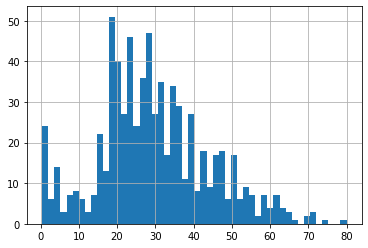

In [206]:
titanic['Age'].hist(bins=50)

<AxesSubplot:>

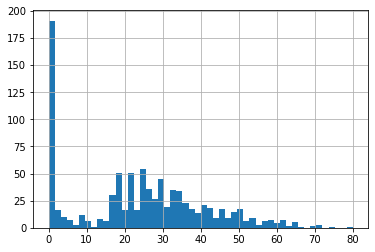

In [211]:
titanic['Age_hundred'].hist(bins=50)

<AxesSubplot:>

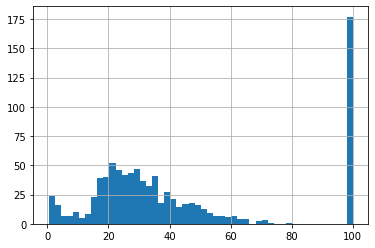

In [212]:
titanic['Age_hundred'].hist(bins=50)

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_hundred', ylabel='Density'>

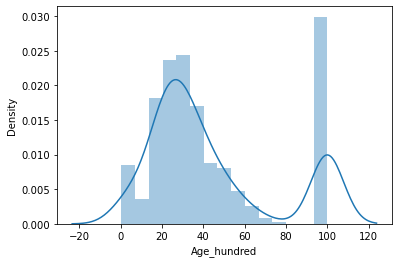

In [215]:
#for col_id in df.columns:
#    sns.distplot(df[col_id])

#sns.distplot(titanic["Age"])    

#sns.distplot(titanic["Age_zero"])

sns.distplot(titanic["Age_hundred"])

### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

## Filing Nan with pad/fill(Fill methods Forward) and bfill/backfill(Fill methods Backward)

In [216]:
def impute_nan(df,variable):
    df[variable+'_pfill']=df[variable].fillna(method='pad')
    df[variable+'_bfill']=df[variable].fillna(method='backfill')
    

In [217]:
impute_nan(titanic,'Cabin')

In [218]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new,Age_zero,Age_hundred,Cabin_zero,Cabin_hundred,Cabin_pfill,Cabin_bfill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0,22.0,0,100,NaN,C85
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,38.0,38.0,C85,C85,C85,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,26.0,0,100,C85,C123
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,35.0,35.0,C123,C123,C123,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0,35.0,0,100,C123,E46


impute_nan(data2,'Cabin')

In [219]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new,Age_zero,Age_hundred,Cabin_zero,Cabin_hundred,Cabin_pfill,Cabin_bfill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0,22.0,0,100,NaN,C85
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,38.0,38.0,C85,C85,C85,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,26.0,0,100,C85,C123
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,35.0,35.0,C123,C123,C123,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0,35.0,0,100,C123,E46


<AxesSubplot:>

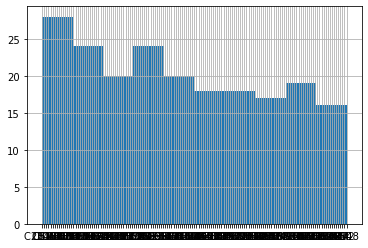

In [220]:
titanic['Cabin'].hist()

<AxesSubplot:>

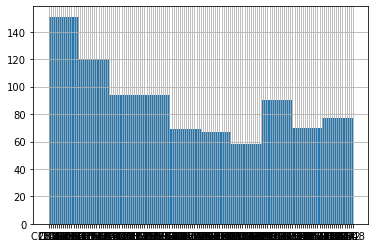

In [221]:
titanic['Cabin_pfill'].hist()

In [227]:
titanic["Cabin_pfill"]

0       NaN
1       C85
2       C85
3      C123
4      C123
       ... 
886     C50
887     B42
888     B42
889    C148
890    C148
Name: Cabin_pfill, Length: 891, dtype: object

In [224]:
titanic.shape

(891, 19)

Notice, values in the first row is still NaN value because there is no row above it from which non-NA value could be propagated

In [228]:
titanic["Cabin_bfill"]

0       C85
1       C85
2      C123
3      C123
4       E46
       ... 
886     B42
887     B42
888    C148
889    C148
890     NaN
Name: Cabin_bfill, Length: 891, dtype: object

### Advantages

- Easy to implement
- Working fine with small data and less missing values

### Disadvantages

- Distorts the original distribution of the variable
- values in the first row is still NaN value because there is no row above it from which non-NA value could be propagated

## Drop Missing Values
If you want to simply exclude the missing values, then use the dropna function along with the axis argument. By default, axis=0, i.e., along row, which means that if any value within a row is NA then the whole row is excluded.

In [229]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new,Age_zero,Age_hundred,Cabin_zero,Cabin_hundred,Cabin_pfill,Cabin_bfill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0,22.0,0,100,NaN,C85
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,38.0,38.0,C85,C85,C85,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,26.0,0,100,C85,C123
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,35.0,35.0,C123,C123,C123,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0,35.0,0,100,C123,E46


In [230]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  new            891 non-null    object 
 13  Age_zero       891 non-null    float64
 14  Age_hundred    891 non-null    float64
 15  Cabin_zero     891 non-null    object 
 16  Cabin_hundred  891 non-null    object 
 17  Cabin_pfill    890 non-null    object 
 18  Cabin_bfil

In [232]:
titanic.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
new                0
Age_zero           0
Age_hundred        0
Cabin_zero         0
Cabin_hundred      0
Cabin_pfill        1
Cabin_bfill        1
dtype: int64

In [80]:
df1=df.copy()

In [235]:
df=titanic.copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new,Age_zero,Age_hundred,Cabin_zero,Cabin_hundred,Cabin_pfill,Cabin_bfill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0,22.0,0,100,NaN,C85
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,38.0,38.0,C85,C85,C85,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,26.0,0,100,C85,C123
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,35.0,35.0,C123,C123,C123,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0,35.0,0,100,C123,E46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,27.0,27.0,0,100,C50,B42
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B42,19.0,19.0,B42,B42,B42,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0.0,100.0,0,100,B42,C148
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C148,26.0,26.0,C148,C148,C148,C148


In [236]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new,Age_zero,Age_hundred,Cabin_zero,Cabin_hundred,Cabin_pfill,Cabin_bfill
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,38.0,38.0,C85,C85,C85,C85
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,35.0,35.0,C123,C123,C123,C123
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E46,54.0,54.0,E46,E46,E46,E46
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,G6,4.0,4.0,G6,G6,G6,G6
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,C103,58.0,58.0,C103,C103,C103,C103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,D35,47.0,47.0,D35,D35,D35,D35
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,B51 B53 B55,33.0,33.0,B51 B53 B55,B51 B53 B55,B51 B53 B55,B51 B53 B55
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,C50,56.0,56.0,C50,C50,C50,C50
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B42,19.0,19.0,B42,B42,B42,B42


In [239]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
new                0
Age_zero           0
Age_hundred        0
Cabin_zero         0
Cabin_hundred      0
Cabin_pfill        1
Cabin_bfill        1
dtype: int64

In [240]:
df.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,new,Age_zero,Age_hundred,Cabin_zero,Cabin_hundred
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,0,22.0,22.0,0,100
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,38.0,38.0,C85,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,0,26.0,26.0,0,100
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,35.0,35.0,C123,C123
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,0,35.0,35.0,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,0,27.0,27.0,0,100
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,19.0,19.0,B42,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,0,0.0,100.0,0,100
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,26.0,26.0,C148,C148


In [241]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new,Age_zero,Age_hundred,Cabin_zero,Cabin_hundred,Cabin_pfill,Cabin_bfill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0,22.0,0,100,NaN,C85
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,38.0,38.0,C85,C85,C85,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,26.0,0,100,C85,C123
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,35.0,35.0,C123,C123,C123,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0,35.0,0,100,C123,E46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,27.0,27.0,0,100,C50,B42
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B42,19.0,19.0,B42,B42,B42,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0.0,100.0,0,100,B42,C148
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C148,26.0,26.0,C148,C148,C148,C148


### Advantages
- Easy To implement
- If data is missing for more than given threshold(it may 50% or 60% or 70%)of the observations, it may be wise to discard it if the variable is insignificant.

### Disadvantage
- reduced statistical power (because it reduces the number of samples n, the estimates will have larger standard errors)
- waste of information in data

## Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 
It assumes that the data are missing completely at random(MCAR)

In [242]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [243]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [244]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [245]:
df['Age'].isnull().sum()

177

In [246]:
df['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [247]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [87]:
#taken a random values(taken 177 random values)
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
595    36.00
637    31.00
54     65.00
456    65.00
110    47.00
287    22.00
315    26.00
691     4.00
811    39.00
861    21.00
15     55.00
239    33.00
644     0.75
394    24.00
795    39.00
131    20.00
346    40.00
9      14.00
477    29.00
606    30.00
469     0.75
325    36.00
72     21.00
724    27.00
40     40.00
382    32.00
824     2.00
682    20.00
591    52.00
614    35.00
197    42.00
1      38.00
512    36.00
640    20.00
830    15.00
225    22.00
391    21.00
621    42.00
102    21.00
756    28.00
777     5.00
261     3.00
655    24.00
590    35.00
403    28.00
822    38.00
345    24.00
666    25.00
218    32.00
772    57.00
729    25.00
446    13.00
442    25.00
570    62.00
35     42.00
332    38.00
631    51.00
312    26.00
441    20.00
504    16.00
251    29.00
609    40.00
812    35.00
297     2.00
97     23.00
212    22.00
390    36.00
417    18.00
558    39.00
195    58.00
681    27.00
677    18.00

In [252]:
#index number of the null values hold row
df[df['Age'].isnull()].index

len(df[df['Age'].isnull()].index)

177

In [253]:
def impute_nan(df,variable):
    
    df[variable+"_random"]=df[variable]
    
    ##It will have the random sample to fill the na
    
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    ##pandas need to have same index in order to merge the dataset
    
    random_sample.index=df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [254]:
impute_nan(df,"Age")

In [255]:
df

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,15.0
889,1,26.0,30.0000,26.0


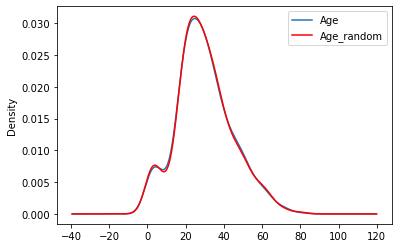

In [256]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages
- Easy To implement
- There is less distortion in variance

### Disadvantage
- Every situation randomness wont work

In [257]:
df.head()

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [259]:
df.groupby(['Survived'])['Age'].mean() #GroupBy is a powerful and versatile function in Python. It allows you to split your data into separate groups to perform computations for better analysis.

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

## Mean/ Median /Mode imputation

### Which variables can I impute with Mean / Median Imputation?

The mean and median can only be calculated on numerical variables, therefore, these methods are suitable for continuous and discrete numerical variables only.

### Assumptions:

1. Data is missing completely at random (MCAR)
2. The missing observations, most likely look like the majority of the observations in the variable (aka, the mean/median)
3. If data is missing completely at random, then it is fair to assume that the missing values are most likely very close to the value of the mean or the median of the distribution
4. Whenever we have a outlier in the data we prefer median and mode.

If a variable is normally distributed, the mean, median, and mode, are approximately the same. Therefore, replacing missing values by the mean and the median are equivalent. Replacing missing data by the mode is not common practice for numerical variables

If the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

In [260]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [261]:
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [262]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [263]:
median=df.Age.median()
median

28.0

In [264]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [265]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


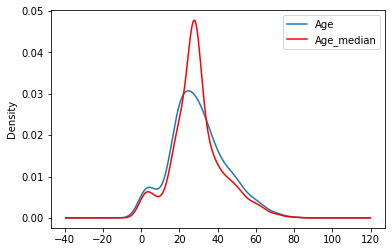

In [266]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages

- Easy to implement(Robust to outliers)
- Faster way to obtain the complete dataset
- Can be integrated into production (during model deployment).

#### Disadvantages

- Change or Distortion in the original variance
- Impacts Correlation
- Distortion of the original variance.







## Capturing NAN values with a new feature

It works well if the data are not missing completely at random 

In [267]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [269]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [270]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [271]:
df['Age_NAN'].value_counts()

0    714
1    177
Name: Age_NAN, dtype: int64

In [272]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values

#### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

## End of Distribution imputation


In [273]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

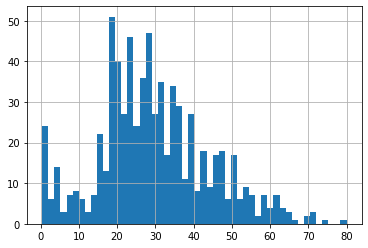

In [274]:
df.Age.hist(bins=50)

In [275]:
extreme=df.Age.mean()+3*df.Age.std()

In [279]:
df.Age.mean()

29.69911764705882

In [276]:
extreme

73.27860964406095

In [281]:
df.Age.std()*3

43.57949199700213

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

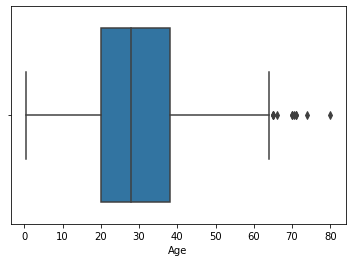

In [282]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [283]:
def impute_nan(df,variable,median,extreme):
    
    extreme=df.Age.mean()+3*df.Age.std()
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [284]:
impute_nan(df,'Age',df.Age.median(),extreme)

<AxesSubplot:>

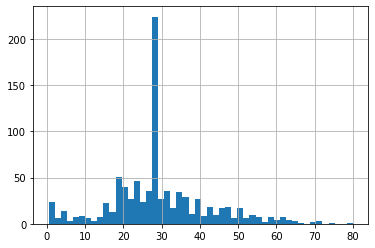

In [285]:
df['Age'].hist(bins=50)

<AxesSubplot:>

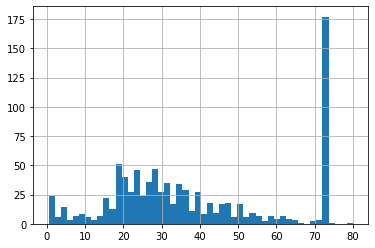

In [286]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

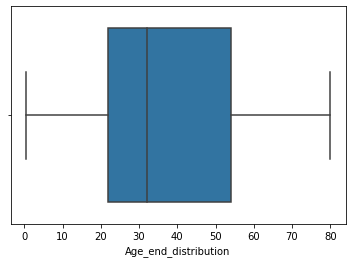

In [287]:
sns.boxplot('Age_end_distribution',data=df)

## using different model or  Predicting The Missing Values

One smart way of doing this could be training a classifier over your columns with missing values as a dependent variable against other features of your data set and trying to impute based on the newly trained classifier.

 

In [288]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [289]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [290]:
df1=df.dropna()

In [291]:
X=df1.loc[:,('Survived','Fare')]
y=df1.loc[:,'Age']

In [292]:
from sklearn.linear_model import LinearRegression
df1=df.dropna()
X=df1.loc[:,('Survived','Fare')]
y=df1.loc[:,'Age']
model=LinearRegression()
model.fit(X,y)
df_null=df[df['Age'].isnull()]
X_null=df_null.loc[:,('Survived','Fare')]
predict=model.predict(X_null)

In [295]:
predict

array([30.12510206, 27.00204533, 26.80257682, 30.08250387, 26.82517289,
       30.10567331, 31.61385383, 26.82071032, 26.80272189, 30.10567331,
       30.11099937, 30.36832238, 26.82071032, 30.58175195, 27.77919534,
       30.79042882, 27.07961526, 30.10567331, 30.11099937, 26.82200557,
       30.11099937, 30.11099937, 30.10567331, 26.82157382, 27.38716633,
       30.11099937, 30.10063737, 27.32528101, 30.35954231, 30.08552612,
       30.13215512, 32.23520941, 28.45272535, 30.72840188, 30.7125722 ,
       32.23520941, 30.35277938, 31.5599524 , 27.08839533, 30.10063737,
       26.82071032, 32.23520941, 30.10063737, 30.10567331, 30.7125722 ,
       30.09372937, 30.33220045, 27.08839533, 30.08336737, 29.28859336,
       30.10063737, 30.10063737, 30.90369239, 26.82071032, 29.83295237,
       30.73099238, 30.79042882, 27.60649534, 26.82071032, 27.35608033,
       26.97959433, 30.11099937, 30.38293456, 32.23520941, 27.35608033,
       31.16929639, 30.10567331, 27.10911933, 31.04185239, 30.08

In [296]:
df_null=df[df['Age'].isnull()]
X_null=df_null.loc[:,('Survived','Fare')]
X_null

,Survived,Fare
5,0,8.4583
17,1,13.0000
19,1,7.2250
26,0,7.2250
28,1,7.8792
...,...,...
859,0,7.2292
863,0,69.5500
868,0,9.5000
878,0,7.8958


In [298]:
predict=model.predict(X_null)
predict

array([30.12510206, 27.00204533, 26.80257682, 30.08250387, 26.82517289,
       30.10567331, 31.61385383, 26.82071032, 26.80272189, 30.10567331,
       30.11099937, 30.36832238, 26.82071032, 30.58175195, 27.77919534,
       30.79042882, 27.07961526, 30.10567331, 30.11099937, 26.82200557,
       30.11099937, 30.11099937, 30.10567331, 26.82157382, 27.38716633,
       30.11099937, 30.10063737, 27.32528101, 30.35954231, 30.08552612,
       30.13215512, 32.23520941, 28.45272535, 30.72840188, 30.7125722 ,
       32.23520941, 30.35277938, 31.5599524 , 27.08839533, 30.10063737,
       26.82071032, 32.23520941, 30.10063737, 30.10567331, 30.7125722 ,
       30.09372937, 30.33220045, 27.08839533, 30.08336737, 29.28859336,
       30.10063737, 30.10063737, 30.90369239, 26.82071032, 29.83295237,
       30.73099238, 30.79042882, 27.60649534, 26.82071032, 27.35608033,
       26.97959433, 30.11099937, 30.38293456, 32.23520941, 27.35608033,
       31.16929639, 30.10567331, 27.10911933, 31.04185239, 30.08

## using algorithm that support missing value

Not all algorithms fail when there is missing data.
There are algorithms that can be made robust to missing data, such as k-Nearest Neighbors that can ignore a column from a distance measure when a value is missing. Naive Bayes can also support missing values when making a prediction.
One of the really nice things about Naive Bayes is that missing values are no problem at all.
There are also algorithms that can use the missing value as a unique and different value when building the predictive model, such as classification and regression trees.

A few predictive models, especially tree-based techniques, can specifically account for missing data.Sadly, the scikit-learn implementations of naive bayes, decision trees and k-Nearest Neighbors are not robust to missing values. Although it is being considered.Nevertheless, this remains as an option if you consider using another algorithm implementation (such as xgboost) or developing your own implementation.


# How To Handle Categorical Missing Values

## With Frequent Number

In [314]:
d=pd.read_csv('loan.csv')

In [315]:
d.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [308]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [312]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [311]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [324]:
df.shape

(1460, 4)

In [309]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [310]:
df.isnull().mean().sort_values(ascending=True) # percentage of the null values

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [316]:
df.isnull().mean().sort_values(ascending=True)*100

SalePrice       0.000000
BsmtQual        2.534247
GarageType      5.547945
FireplaceQu    47.260274
dtype: float64

In [317]:
### Compute the frequency with every feature

In [320]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [323]:
df['BsmtQual'].nunique()

4

In [319]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

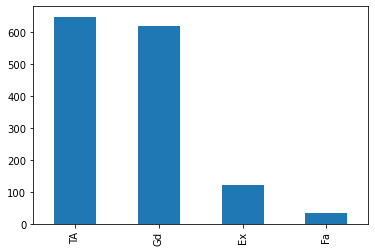

In [322]:
df['BsmtQual'].value_counts().plot.bar()

In [330]:
df.groupby(['BsmtQual'])

In [331]:
df.groupby(['BsmtQual'])['BsmtQual']

In [334]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [335]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False)

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

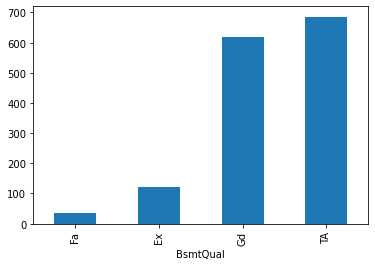

In [343]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=True).plot.bar()

<AxesSubplot:xlabel='BsmtQual'>

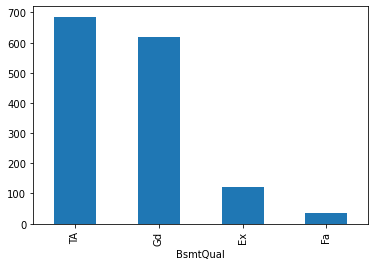

In [344]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

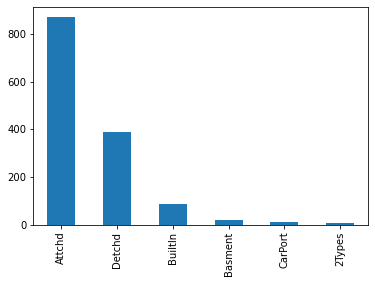

In [326]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

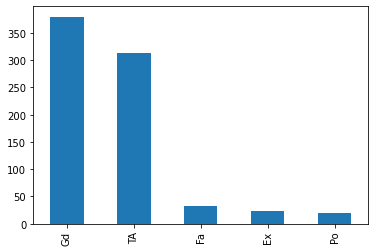

In [327]:
df['FireplaceQu'].value_counts().plot.bar()

In [336]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [350]:
df['GarageType'].value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [329]:
df['GarageType'].mode()[0]

'Attchd'

In [337]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [351]:
def impute_nan(df,variable):
    
    most_frequent_category=df[variable].mode()[0]
    
    df[variable].fillna(most_frequent_category,inplace=True)

In [352]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [353]:
df.isnull().mean()

BsmtQual        0.0
FireplaceQu     0.0
GarageType      0.0
SalePrice       0.0
BsmtQual_Var    0.0
dtype: float64

### Advantages
- Easy To implement
- Fater way to implement

### Disadvantages
- Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
- It distorts the relation of the most frequent label

## Adding a variable to capture NAN

In [354]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [360]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [361]:
df['BsmtQual'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: BsmtQual, Length: 1460, dtype: bool

In [363]:
df['BsmtQual'].mode()[0]

'TA'

In [364]:
np.where(df['BsmtQual'].isnull(),1,0)  #where(condition, [x, y])

array([0, 0, 0, ..., 0, 0, 0])

In [366]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)

frequent=df['FireplaceQu'].mode()[0]

df['FireplaceQu'].fillna(frequent,inplace=True)

In [367]:
df['BsmtQual'].fillna(frequent,inplace=True)

### Advantage:
    
- Capture the importance of missingness.

### Disadvantage:
- Creating Additional Features(Curse of Dimensionality) e.g. if there are 10 columns have null values need to create 10 extra columns.
- Potentially misunderstood data & the number of missing data should be large enough.

## Suppose if you have more frequent categories, we just replace NAN with a new category

In [368]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [370]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [371]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [372]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [373]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [374]:
df

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd


### Advantage:

- Simple and easy to implement for categorical variables/columns and preserves the variance.

### Disadvantage:

- May create random data if the missing category is more.
- Doesn’t give good results when missing data is a high percentage of the data.

## Develop a model to predict missing values: 

One smart way of doing this could be training a classifier over your columns with missing values as a dependent variable against other features of your data set and trying to impute based on the newly trained classifier.

 

## Apply unsupervised Machine learning techniques:

In this approach, we use unsupervised techniques like K-Means, Hierarchical clustering, etc. The idea is that you can skip those columns which are having missing values and consider all other columns except the target column and try to create as many clusters as no of independent features(after drop missing value columns), finally find the category in which the missing row falls.


For Example, 1, To implement this strategy, we drop the Feature-1 column and then use Feature-2 and Feature-3 as our features for the new classifier and then finally after cluster formation, try to observe in which cluster the missing record is falling in and we are ready with our final dataset for further analysis.

### oops Implementation

In [307]:
class Handlingmissingvalue:
    
    def __init__(self):
        #importing data as csv
        self.df=pd.read_csv("titanic.csv")
        
    def Filling_with_Arbitrary_value (self,variable):
        try:
            self.df[variable+'_zero']=self.df[variable].fillna(0)
            self.df[variable+'_hundred']=self.df[variable].fillna(100)
            return self.df
        except Exception as e:
            raise Exception()
            
    def Filling_with_ffill_bfill():
        self.df[variable+'_pfill']=self.df[variable].fillna(method='pad')
        self.df[variable+'_bfill']=self.df[variable].fillna(method='backfill')
    
    def Drop_Missing_Values():
        df.dropna(axis=1)
    
    def Random_Sample_Imputation():
        df[variable+"_random"]=df[variable]
        ##It will have the random sample to fill the na
        random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
        ##pandas need to have same index in order to merge the dataset
        random_sample.index=df[df[variable].isnull()].index
        df.loc[df[variable].isnull(),variable+'_random']=random_sample
    
    def Mean_Median_Mode_imputation():
        df[variable+"_median"]=df[variable].fillna(median)
   
    def Capturing_with_new_feature():
        df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
        
    def End_of_distribution_imputation():
        extreme=df.Age.mean()+3*df.Age.std()
        df[variable+"_end_distribution"]=df[variable].fillna(extreme)
        df[variable].fillna(median,inplace=True)
        
    def Predicting_Missing_Values():
        df1=df.dropna()
        X=df1.loc[:,('Survived','Fare')]
        y=df1.loc[:,'Age']
        model=LinearRegression()
        model.fit(X,y)
        df_null=df[df['Age'].isnull()]
        X_null=df_null.loc[:,('Survived','Fare')]
        predict=model.predict(X_null)
        
    def Categorical_With_Frequent_Number():
        most_frequent_category=df[variable].mode()[0]
        df[variable].fillna(most_frequent_category,inplace=True)
    
    
#object creation
obj=Handlingmissingvalue()

#method calls
obj.Filling_with_Arbitrary_value("Age")
obj.Filling_with_ffill_bfill()
obj.Drop_Missing_Values()
obj.Random_Sample_Imputation()
obj.Mean_Median_Mode_imputation()
obj.Capturing_with_new_feature()
obj.End_of_distribution_imputation()
obj.Predicting_Missing_Values()
obj.Categorical_With_Frequent_Number()

TypeError: Filling_with_ffill_bfill() takes 0 positional arguments but 1 was given